## Titanic Data Set Kaggle Starter Competition  
I will be going through the titanic data set, cleaning up the data and performing feature engineering.  
Let us start by importing the libraries.

In [984]:
# import libraries
import pandas as pd
# import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

#import numpy
import numpy as np

#import matplotlib
import matplotlib.pyplot as plt


In [985]:
# import data
datamaster = pd.read_csv("data/train.csv")
data = datamaster.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

---
## NA Values


Below we will see which factores contain NA values and then we will decide how to deal with them on a factor by factor basis.

In [986]:
# view % of na values for each category
data.isna().sum()/891*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

The data shows that there are three factors with missing values.
1. Age
2. Cabin
3. Embarked

Let's see how we can deal with this missing data.

### Age NA Values

**Age** has 19.38% missing values; there is too many missing values to try to impute the data. For now, let's add a variable that indicates whether age value is NA and simply replace NA with 0.

In [987]:
# Add a column to the data set that indicates 1 if age value is NA and 0 if not
data['AgeNA'] = data.Age.isna().astype(int)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [988]:
# replace all na in age column with 0
data['Age'].fillna(0,inplace=True)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeNA            0
dtype: int64

Now we have 0 NA values for Age.  
Let's check to make sure AgeNA column retained it's values:

In [989]:
# Checking AgeNA column to make sure it retained the NA indication.
data['AgeNA'].sum()

177

And it's still showing 177 NA values, which is what we started with. Great! Let's move on to Cabin.

### Cabin NA Values

**Cabin** has 77.1% missing values. Looking further into this we find that there was only one partial list found known as "The Cave List" that was found on the body of Herbert Cave. The list only contains some of the passenger accomodations on the titanic, and it is known to have errors and missing passengers, as it was printed before some passengers booked and before some had cancelled. Considering the questionable accuracy of the document, and how little of the passenger data is contained, I will be dropping it entirely and save it for an excercise at a later date.

Information was found from the following sources and can be explored for more information:

[A Thorough Analysis of the Cave List by Daniel Klistorner](https://www.encyclopedia-titanica.org/the-cave-list.html)  
[The Cave List](https://www.encyclopedia-titanica.org/cave-list.html)

A possible approach would be to create a separate model for when cabin data is present, which might increase the accuracy of the predictions in those special cases. But for now we will proceed without the cabin data.



In [990]:
# drop the cabin column from the dataset
data = data.drop('Cabin',axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeNA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### Embarked NA Values

**Embarked** only has 0.22% of values missing which we can either impute or simply drop the rows at it is not a large part of the dataset. Let's look at the missing rows of data.

In [991]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeNA
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,0


There are only two rows missing data from which the port they embarked from. They have the same ticket number and paid the same fare, maybe their is a way to match this to other passengers. But for now, since it is only two rows I will just drop them from the dataset and maybe revisit this later.

In [992]:
data.dropna(subset='Embarked', inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeNA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Now let's look to see if there is any Na values left in the data.

In [993]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeNA          0
dtype: int64

Great! No NAs left in the dataset. Let's move on to see if we can change some other factors.

---

## Removing Outliers


We've removed all of the NA values from the dataset, let's see what else we can do before we start training models. 

We also have to see if there's any outliers and scale the data if needed before modeling.

In [994]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeNA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


<Figure size 640x480 with 0 Axes>

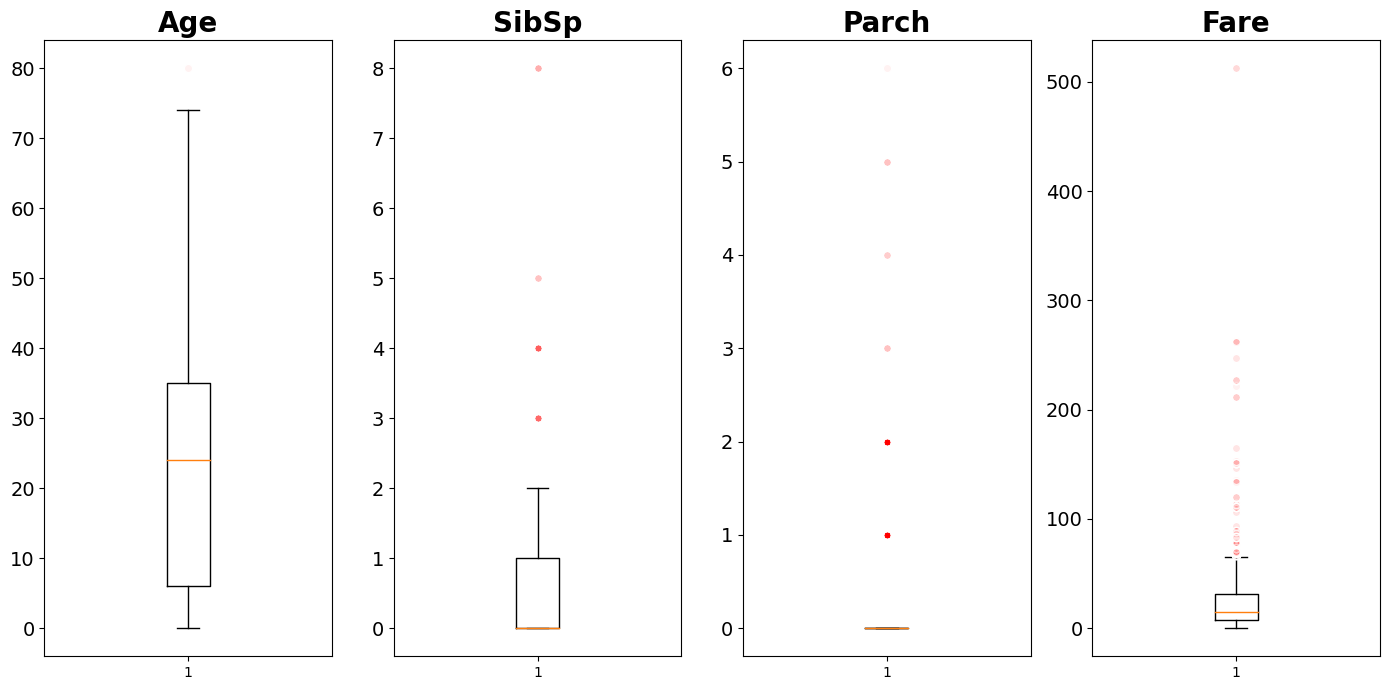

In [995]:
plt.clf()
red_circle = dict(markerfacecolor=[1,0,0,0.05],marker='o',markeredgecolor='white')
cols = ['Age', 'SibSp','Parch','Fare']
fig,axs = plt.subplots(1,len(cols),figsize=(14,7))

for i,ax in enumerate(axs.flat):
    ax.boxplot(data[cols[i]],flierprops=red_circle)
    ax.set_title(cols[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y',labelsize=14)

plt.tight_layout()
plt.show()

Age looks ok. however our data is being skewed with the large amount of NA's added to the table.   
SibSp we could maybe look at the data points with 8 and think about removing them.  
Parch we can see that the vast majority of the data is 0, we can look into how many data points are not at 0 and maybe only keep the ones around 1 and 2.  
For Fare there is a large outlier at the $500 price point which we will remove.  

### Fare Outliers

In [996]:
# Let's remove the outlier from Fare
data['Fare'].sort_values(ascending=False).head(10)

258    512.3292
737    512.3292
679    512.3292
341    263.0000
27     263.0000
88     263.0000
438    263.0000
311    262.3750
742    262.3750
299    247.5208
Name: Fare, dtype: float64

As we can see there are only three data points > 500, which are almost double the next lowest data point. So we will drop them from the data set.

In [997]:
data.drop([258,737,679],axis=0,inplace=True)
data['Fare'].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
815      0.000
466      0.000
806      0.000
481      0.000
597      0.000
Name: Fare, Length: 886, dtype: float64

<Figure size 640x480 with 0 Axes>

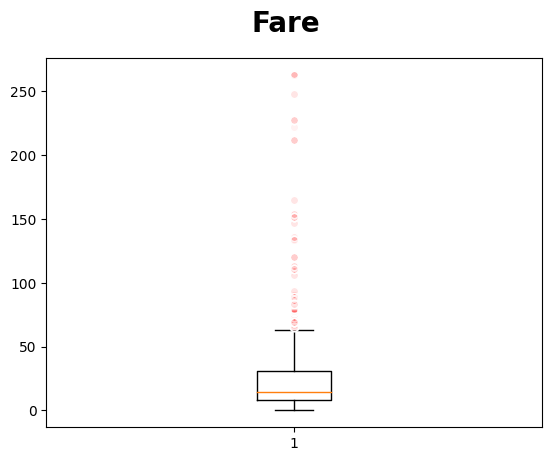

In [998]:
plt.clf()
fig = plt.figure()
plt.boxplot(data['Fare'],flierprops=red_circle,)
fig.suptitle('Fare', fontsize=20, fontweight='bold')

plt.show()

### Parch Outliers

In [999]:
ParchOutliers = data[data['Parch'] > 2]['Parch'].sort_values(ascending=False)
print(ParchOutliers,'\n Count:',ParchOutliers.count())

678    6
13     5
25     5
610    5
638    5
885    5
167    4
360    4
438    4
567    4
86     3
437    3
736    3
774    3
858    3
Name: Parch, dtype: int64 
 Count: 15


As we can see there is only 15 data points that have Parch > 2.  
Let's remove these data points.

In [1000]:
data.drop(ParchOutliers.index.values,inplace=True)

<Figure size 640x480 with 0 Axes>

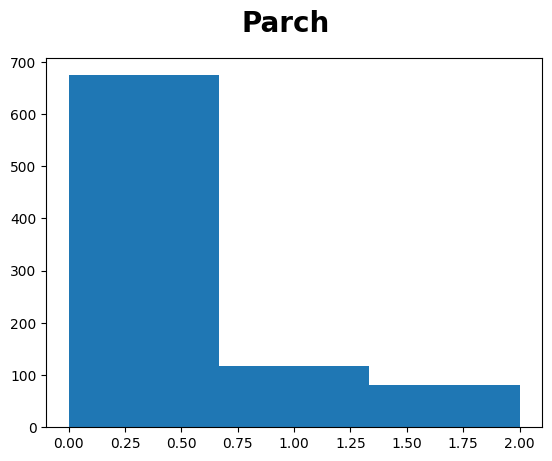

In [1001]:
plt.clf()
fig = plt.figure()
plt.hist(data['Parch'],bins=3)
fig.suptitle('Parch', fontsize=20, fontweight='bold')
plt.show()

The data still needs to be normalized but the outliers have been removed

### SibSp Outliers

In [1002]:
SibSpOutliers = data[data['SibSp'] > 4]['SibSp'].sort_values(ascending=False)
print(SibSpOutliers,'\n Count:',SibSpOutliers.count())

159    8
180    8
201    8
324    8
792    8
846    8
863    8
59     5
71     5
386    5
480    5
683    5
Name: SibSp, dtype: int64 
 Count: 12


As we can see there are only 12 data points > 4, so let's remove them

Let's go through the factors we haven't touched and ideas we could implement to make them more modeling friendly. 
1. **PassengerID, Name, Ticket:** Let's drop Passenger ID, Name, and Ticket as they are all unique identifiers for the data and won't capture any patterns




In [1003]:
# drop name and ticket
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeNA
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


## Categorical Data and Scaling

Now we have to factorize the categorical data and scale the data.

In [1004]:
# factorize and scale data
# encode the categorical data
le = LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

# scale the data
colnames = data.columns
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=colnames)

data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeNA
0,0.0,1.0,1.0,0.2750,0.125,0.0,0.027567,1.0,0.0
1,1.0,0.0,0.0,0.4750,0.125,0.0,0.271039,0.0,0.0
2,1.0,1.0,0.0,0.3250,0.000,0.0,0.030133,1.0,0.0
3,1.0,0.0,0.0,0.4375,0.125,0.0,0.201901,1.0,0.0
4,0.0,1.0,1.0,0.4375,0.000,0.0,0.030608,1.0,0.0
5,0.0,1.0,1.0,0.0000,0.000,0.0,0.032161,0.5,1.0
6,0.0,0.0,1.0,0.6750,0.000,0.0,0.197196,1.0,0.0
7,0.0,1.0,1.0,0.0250,0.375,0.5,0.080133,1.0,0.0
8,1.0,1.0,0.0,0.3375,0.000,1.0,0.042332,1.0,0.0
9,1.0,0.5,0.0,0.1750,0.125,0.0,0.114338,0.0,0.0


Now let's look at the data again:

<Figure size 640x480 with 0 Axes>

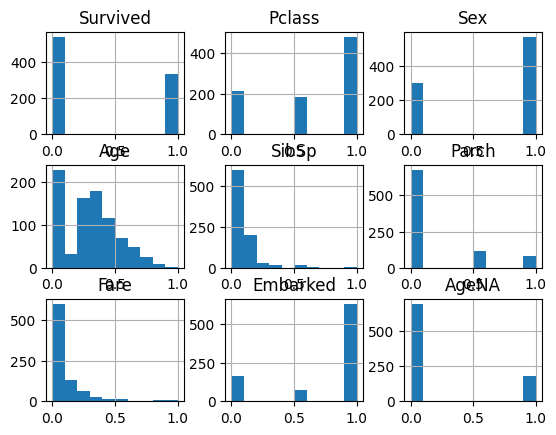

In [1005]:
plt.clf()
data.hist()
plt.show()

Now the data is prepared for some modeling, let's create a function to help us convert the test dataset given to us. 


In [1006]:
def prepare_data(dataset):
    data = dataset.copy()
    # add AgeNA column and then replace NA with 0
    data['AgeNA'] = data.Age.isna().astype(int)
    data['Age'].fillna(0,inplace=True)

    # drop Cabin, Name, and Ticket column
    data = data.drop('Cabin',axis=1)
    data.drop(['Name','Ticket'],axis=1,inplace=True)
    
    # set the Index to Passenger ID
    P_Id = data['PassengerId']
    data.drop('PassengerId',inplace=True,axis=1)

    # encode the categorical data
    le = LabelEncoder()
    for column_name in data.columns:
        if data[column_name].dtype == object:
            data[column_name] = le.fit_transform(data[column_name])
        else:
            pass

    # scale the data
    colnames = data.columns
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data, columns=colnames)
    data.set_index(P_Id,inplace=True)

    return data

Let's import and run the test.csv dataset given to us to see if the function works.

In [1007]:
testdatamaster = pd.read_csv("data/test.csv")
testdata = testdatamaster.copy()

testdata = prepare_data(testdata)
testdata

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeNA
PassengerId,,,,,,,,
892,1.0,1.0,0.453947,0.000,0.000000,0.015282,0.5,0.0
893,1.0,0.0,0.618421,0.125,0.000000,0.013663,1.0,0.0
894,0.5,1.0,0.815789,0.000,0.000000,0.018909,0.5,0.0
895,1.0,1.0,0.355263,0.000,0.000000,0.016908,1.0,0.0
896,1.0,0.0,0.289474,0.125,0.111111,0.023984,1.0,0.0
...,...,...,...,...,...,...,...,...
1305,1.0,1.0,0.000000,0.000,0.000000,0.015713,1.0,1.0
1306,0.0,0.0,0.513158,0.000,0.000000,0.212559,0.0,0.0
1307,1.0,1.0,0.506579,0.000,0.000000,0.014151,1.0,0.0


Looks good! Let's move on.




---

# Model Selection


I'm just going to run a simple model to see what the prediction is like.

First split the data into train and test sets

In [1008]:
# train_data, test_data = train_test_split(data,
#                                          test_size=0.20,
#                                          random_state=42)

# train_data_y = train_data.loc[:,'Survived']
# train_data_X = train_data.loc[:,train_data.columns != 'Survived']
# test_data_y = test_data.loc[:,'Survived']
# test_data_X = test_data.loc[:,test_data.columns != 'Survived']

X = data.loc[:,data.columns!= 'Survived']
y = data.loc[:,'Survived']

X.shape,y.shape

((871, 8), (871,))

Then use the train_data to choose a model:

In [1009]:
logit = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.5)
randomforest = class


In [1010]:
cross_val_score(logit,X,y)

array([0.79428571, 0.82183908, 0.77011494, 0.79310345, 0.81034483])

In [1011]:
cross_val_score()

TypeError: cross_val_score() missing 2 required positional arguments: 'estimator' and 'X'